# Traffic Pattern Prediction 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
import seaborn as sns

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import lightgbm as lgb
import xgboost as xgb

# Boosting Algorithm Libraries :
from sklearn.ensemble import RandomForestRegressor

In [13]:
# dataset link = "https://drive.google.com/file/d/1y61cDyuO9Zrp1fSchWcAmCxk0B6SMx7X/view?usp=sharing"
train_df = pd.read_csv(r"C:\Users\Manish Joil\OneDrive\Desktop\Smart City Traffic Pattern\train_aWnotuB.csv")
test_df = pd.read_csv(r"C:\Users\Manish Joil\OneDrive\Desktop\Smart City Traffic Pattern\train_aWnotuB.csv")

In [14]:
train_df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [15]:
test_df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [17]:
# Exploring more features 4
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])

train_df["Year"]= train_df['DateTime'].dt.year  
train_df["Month"]= train_df['DateTime'].dt.month  
train_df["Date_no"]= train_df['DateTime'].dt.day  
train_df["Hour"]= train_df['DateTime'].dt.hour  
train_df["Day"]= train_df.DateTime.dt.strftime("%A")

test_df["Year"]= test_df['DateTime'].dt.year  
test_df["Month"]= test_df['DateTime'].dt.month  
test_df["Date_no"]= test_df['DateTime'].dt.day  
test_df["Hour"]= test_df['DateTime'].dt.hour  
test_df["Day"]= test_df.DateTime.dt.strftime("%A")

In [18]:
train_df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


In [19]:
test_df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Year      48120 non-null  int32         
 5   Month     48120 non-null  int32         
 6   Date_no   48120 non-null  int32         
 7   Hour      48120 non-null  int32         
 8   Day       48120 non-null  object        
dtypes: datetime64[ns](1), int32(4), int64(3), object(1)
memory usage: 2.6+ MB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Year      48120 non-null  int32         
 5   Month     48120 non-null  int32         
 6   Date_no   48120 non-null  int32         
 7   Hour      48120 non-null  int32         
 8   Day       48120 non-null  object        
dtypes: datetime64[ns](1), int32(4), int64(3), object(1)
memory usage: 2.6+ MB


In [22]:
train_df.describe()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour
count,48120,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000
mean,2016-09-19 06:03:56.109725696,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,11.500000
min,2015-11-01 00:00:00,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000
25%,2016-04-16 01:45:00,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,5.750000
50%,2016-09-30 03:30:00,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,11.500000
75%,2017-02-25 16:00:00,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,17.250000
max,2017-06-30 23:00:00,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,23.000000
std,NaN,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,6.922258


In [23]:
test_df.describe()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour
count,48120,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000
mean,2016-09-19 06:03:56.109725696,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,11.500000
min,2015-11-01 00:00:00,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000
25%,2016-04-16 01:45:00,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,5.750000
50%,2016-09-30 03:30:00,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,11.500000
75%,2017-02-25 16:00:00,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,17.250000
max,2017-06-30 23:00:00,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,23.000000
std,NaN,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,6.922258


### Data Preprocessing

In [25]:
train_df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
Year        0
Month       0
Date_no     0
Hour        0
Day         0
dtype: int64

In [24]:
test_df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
Year        0
Month       0
Date_no     0
Hour        0
Day         0
dtype: int64

In [26]:
train_df.describe(include="object")

,Day
count,48120
unique,7
top,Sunday
freq,6888


In [27]:
print('before dropping ',train_df.shape[0])
train_df.drop_duplicates(keep="first", inplace=True) 
print('after dropping ',train_df.shape[0])

before dropping  48120
after dropping  48120


In [28]:
# Combine Year, Month, Date_no, and Hour into a proper DateTime without fractional seconds
test_df['DateTime'] = pd.to_datetime(test_df[['Year', 'Month', 'Date_no', 'Hour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H')

# Format the DateTime column to remove fractional seconds
test_df['DateTime'] = test_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [29]:
print('before converting :',train_df['DateTime'].dtype)
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])
print('after converting :',train_df['DateTime'].dtype)
print('after converting :',test_df['DateTime'].dtype)

before converting : datetime64[ns]
after converting : datetime64[ns]
after converting : datetime64[ns]


## EDA(Exploratory Data Analysis)

Text(0.5, 0, 'DateTime')

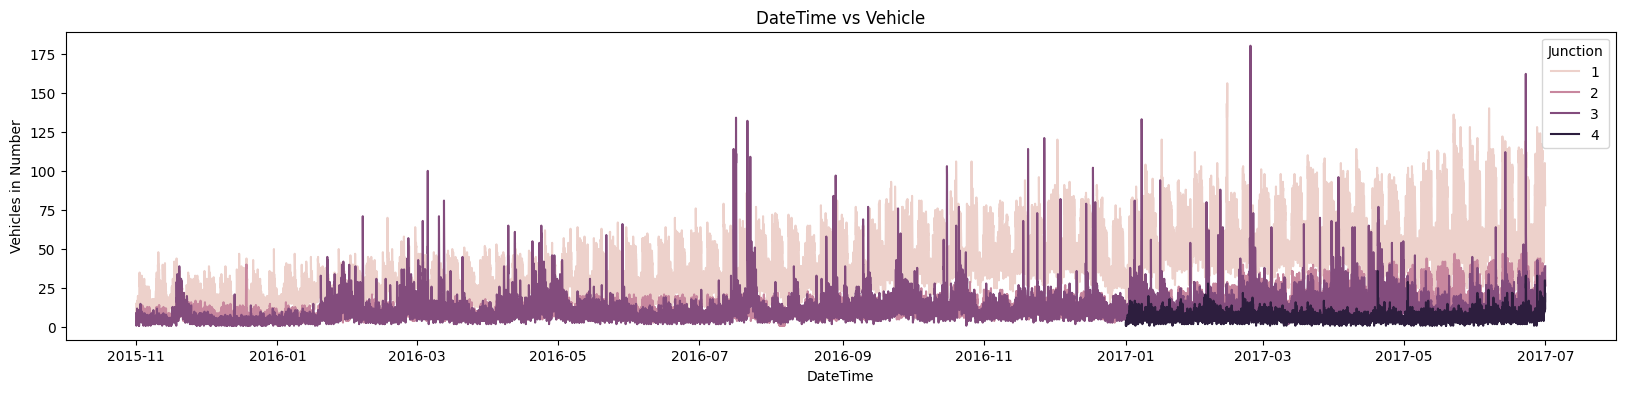

In [31]:
# time series plot
plt.figure(figsize=(20,4))  
time_series=sns.lineplot(x=train_df['DateTime'],y="Vehicles",data=train_df, hue="Junction")  
time_series.set_title("DateTime vs Vehicle")  
time_series.set_ylabel("Vehicles in Number")  
time_series.set_xlabel("DateTime")

Text(0.5, 0, 'Date')

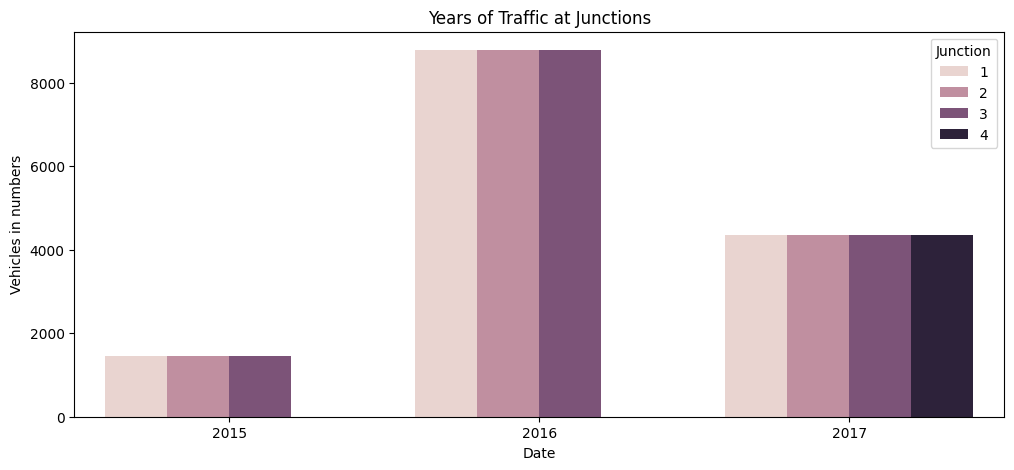

In [32]:
#years of traffic at junction
plt.figure(figsize=(12,5))  
count = sns.countplot(data=train_df, x =train_df["Year"], hue="Junction")  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date")

<Axes: >

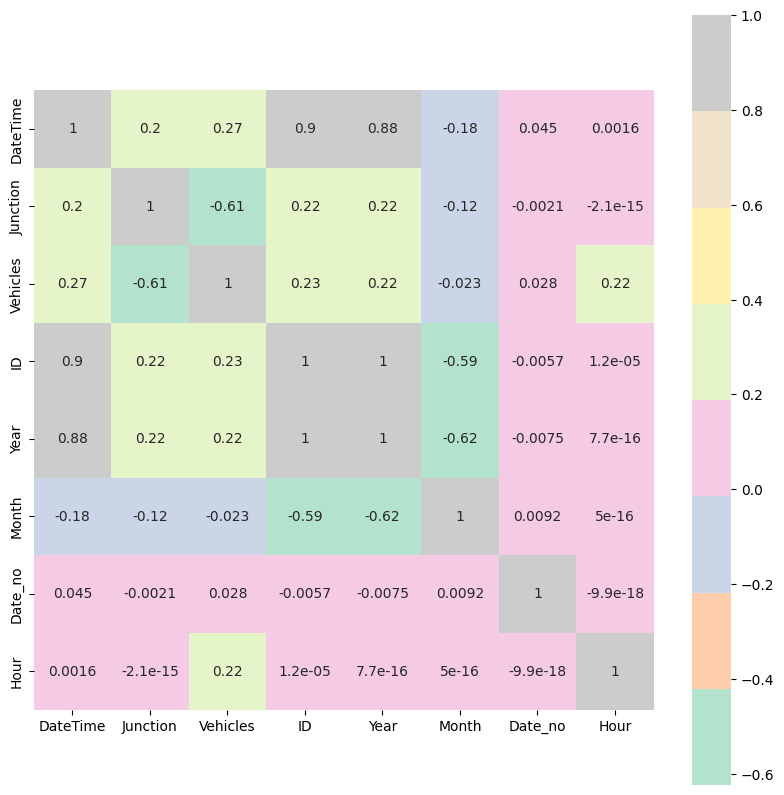

In [33]:
#heat map
corrmat = train_df.iloc[ : , :-1 ].corr()  
plt.subplots(figsize=(10,10))  
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, ) 

### Spliting The Train Data


In [34]:
def datetounix1(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [35]:
train_features = datetounix1(train_df.drop(['Vehicles'], axis=1))
test_features = datetounix1(test_df)


# Store Features / Predictors in array :
X = train_features  
X_valid = test_features

# One Hot Encoding - Using Dummies :
X = pd.get_dummies(X)
X_valid = pd.get_dummies(X_valid)

# Store target 'Vehicles' in y array :
y = train_df['Vehicles'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=512)

## LGBM Regression

In [36]:
# Convert the dataset to LightGBM data format
train_data = lgb.Dataset(X_train, label=y_train)

# Set the parameters for the LightGBM regression model
params = {
    'objective': 'regression',
    'metric': 'rmse'  # Root Mean Squared Error
}

# Train the LightGBM regression model
model = lgb.train(params,train_data, num_boost_round=100)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 32240, number of used features: 14
[LightGBM] [Info] Start training from score 22.676458
Mean Squared Error: 26.130020507003152
Mean Absolute Error: 2.9299309567160123
R2 Score: 0.9407083622016995


## Random Forest Regressor

In [37]:
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
#for i in range(15880):
#    print(y_pred[i],y_test.iloc[i])

C:\Users\Manish Joil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [38]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 15.770556801007558
Mean Absolute Error: 2.5105428211586904
R2 Score: 0.9642150245740428
